___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# plt.rcParams["figure.figsize"] = (10,6)

sns.set_context("poster",font_scale = .5)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignments/Churn Modelling/Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1


In [8]:
def value_counts(df):
  for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()      

In [9]:
value_counts(df)

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender
Male      5457
Female    4543
Name: Gender, dtype: int64

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Balance
0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

HasCrCard
1

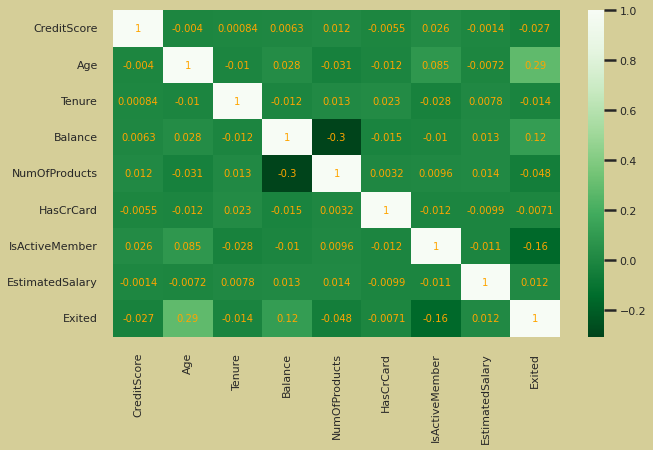

In [129]:
sns.heatmap(df.drop(['Geography','Gender'], axis=1).corr(), annot=True,cmap="Greens_r",
            annot_kws={'size':10, 'color':'orange'})
plt.grid(linewidth=0.5, color='black');

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

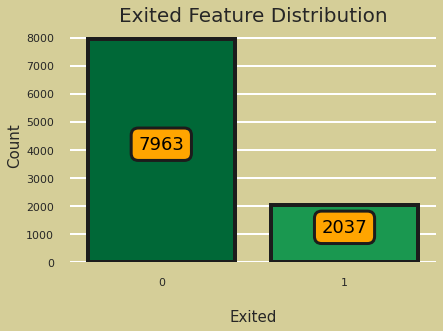

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
plt.tight_layout(pad=7.0)
palette = ["#006837","#1A9850"]
sns.set_context("poster",font_scale = .5)

sns.countplot(x=df["Exited"],ax=ax,palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
ax.set_yscale("linear")
ax.set_title("Exited Feature Distribution",fontsize=20)
ax.set_xlabel("\nExited",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

for container in ax.containers:
    ax.bar_label(ax.containers[0],label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)


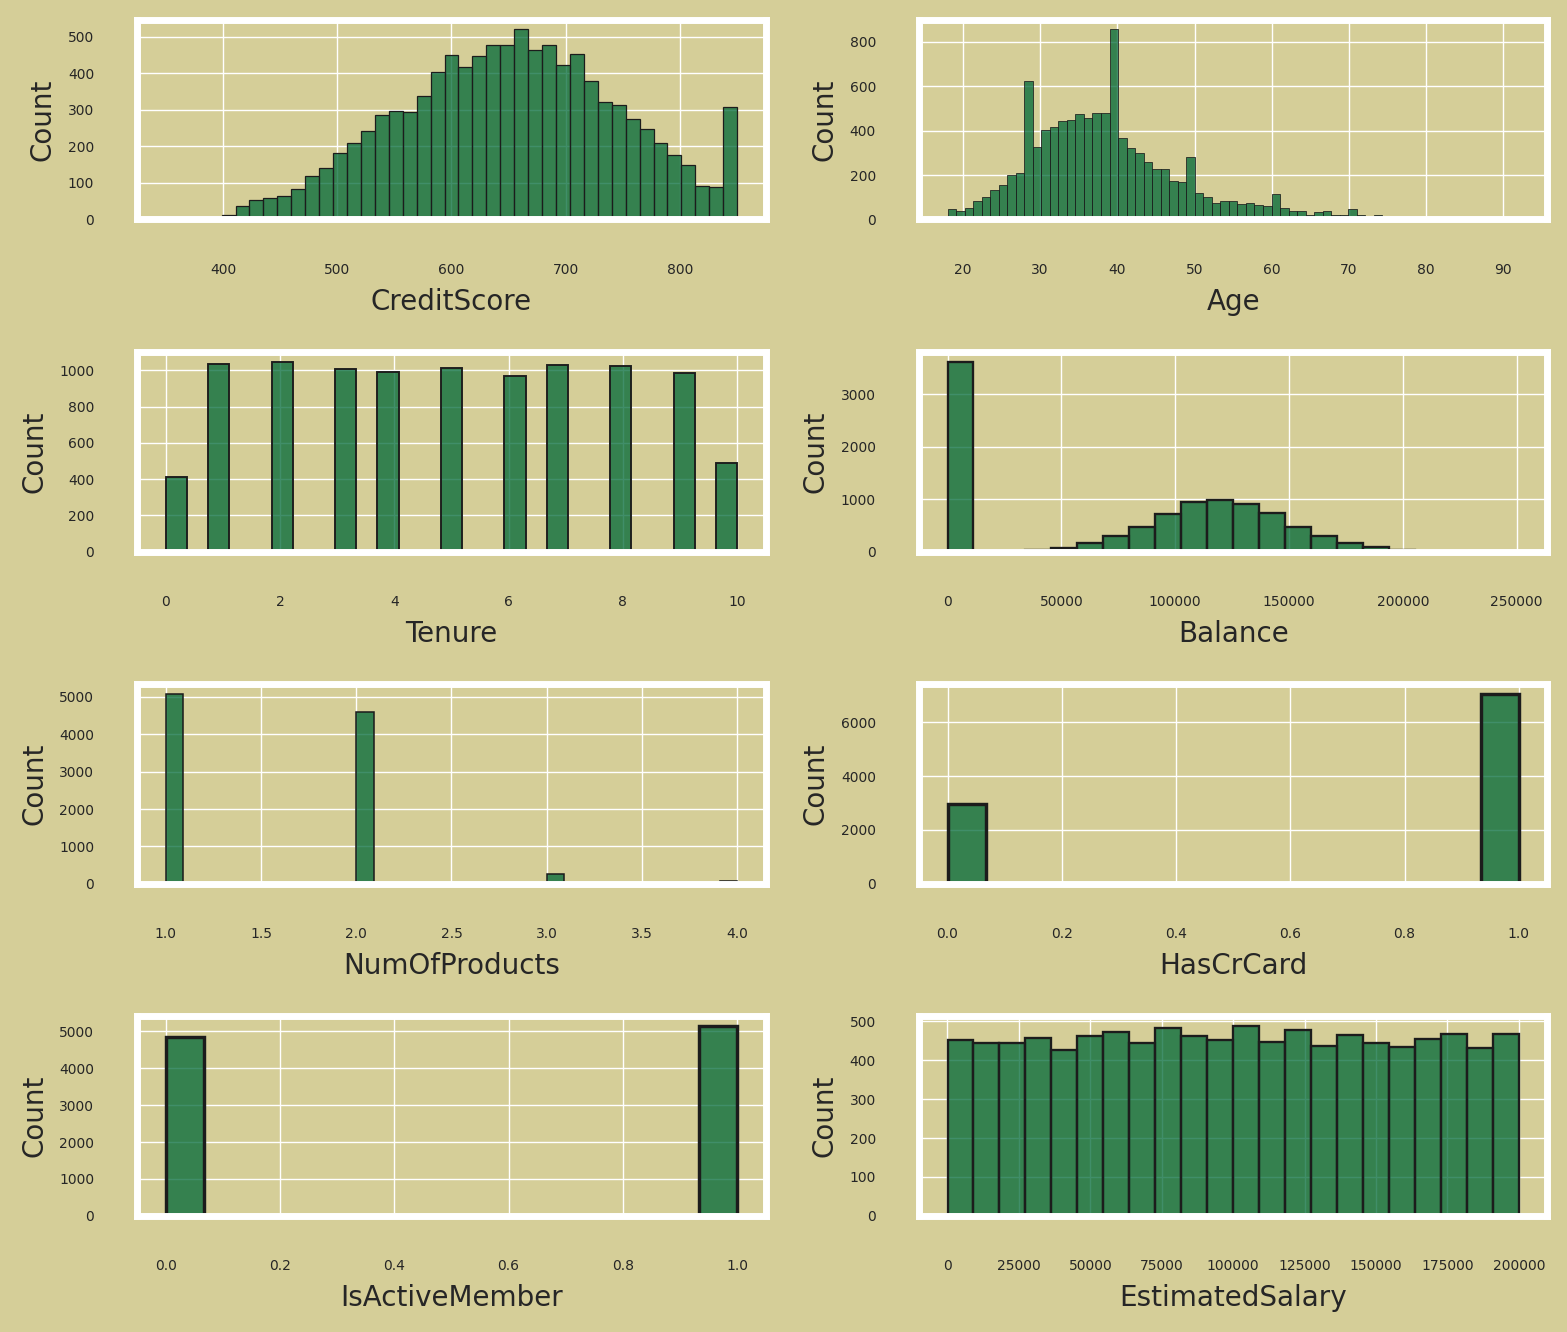

In [136]:
fig = plt.figure(figsize=(8,8), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="object").columns[:-1]):
        plt.subplot(5,2,i+1)
        sns.histplot(df[col], color="#006837", edgecolor = "#1c1c1c")
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.tick_params(axis='both', which='major', labelsize=5)
        plt.grid(linewidth=0.5)
plt.tight_layout();

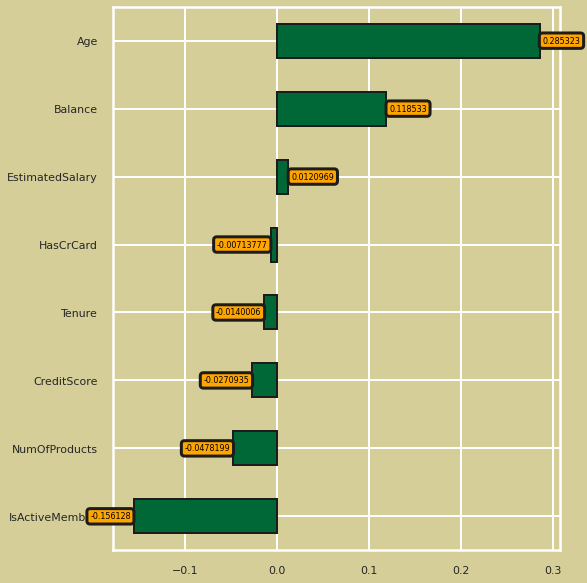

In [137]:
plt.figure(figsize = (8,10))
ax = df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh", color='#006837', edgecolor = "#1c1c1c")
# ax.bar_label(ax.containers[0], fmt='%.2f');
for container in ax.containers:
    ax.bar_label(ax.containers[0],label_type="edge",padding=3,size=8,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


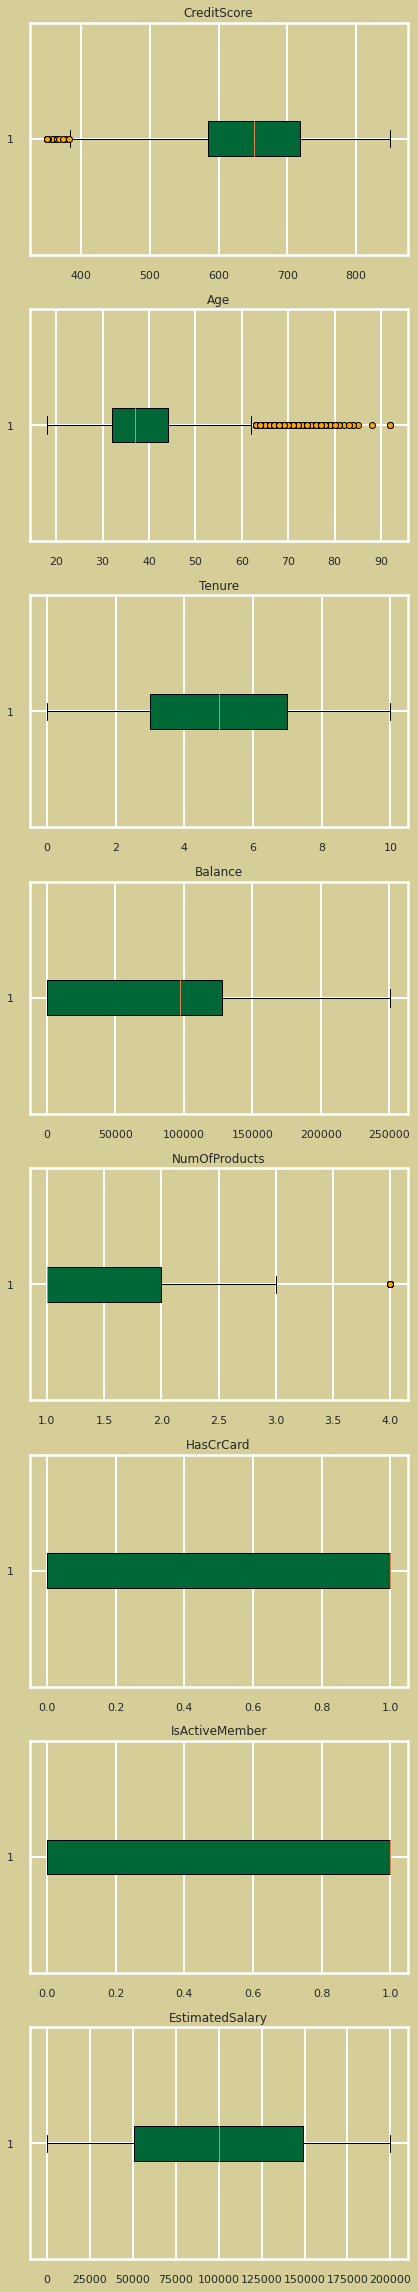

In [152]:
fig, axs = plt.subplots(8,1, figsize=(6, 8*4))

for i, col in enumerate(df.drop(['Geography','Gender','Exited'], axis=1).columns):
    bp = axs[i].boxplot(df[col], patch_artist=True, vert=False)
    for patch in bp["boxes"]:
        patch.set_facecolor("#006837")
    for dot in bp['fliers']:
        dot.set_color("orange")
        dot.set_markerfacecolor("orange")
    axs[i].set_title(col)
plt.tight_layout()




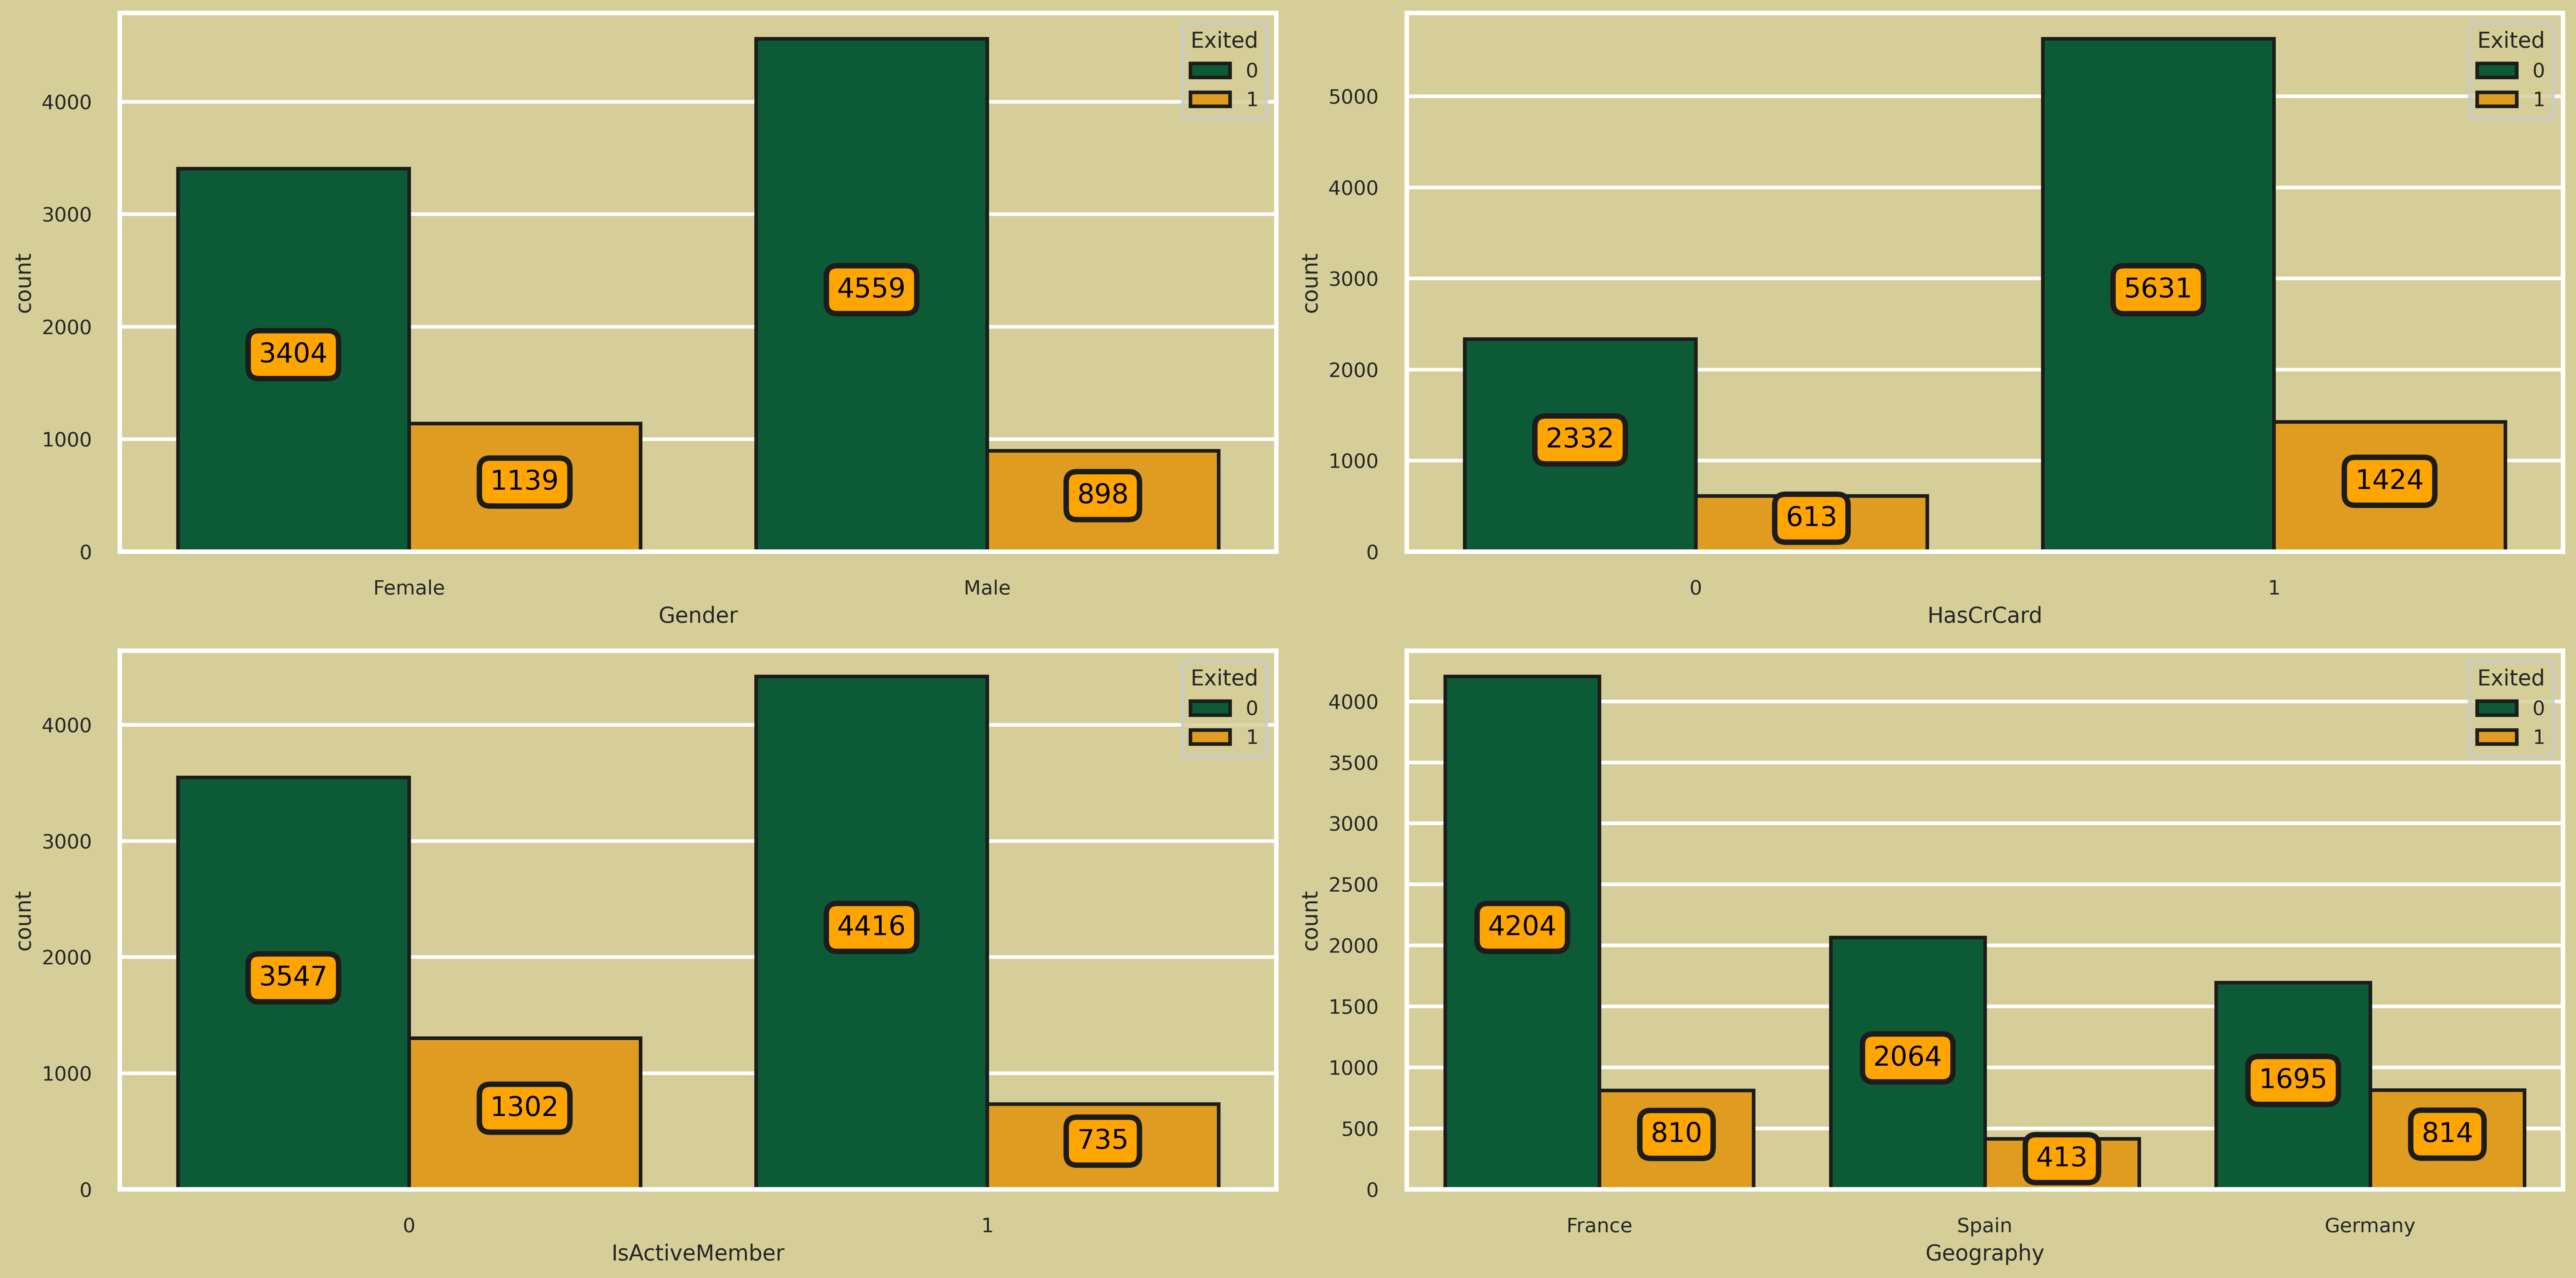

In [182]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(20, 10), dpi=400)
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data=df, x=i, hue="Exited", palette={0:"#006837",1:"#FFA500"}, edgecolor = "#1c1c1c")
    
    for container in ax.containers:
         ax.bar_label(container,label_type="center",padding=3,size=15,color="black",rotation=0,
         bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})
plt.tight_layout()
plt.show()

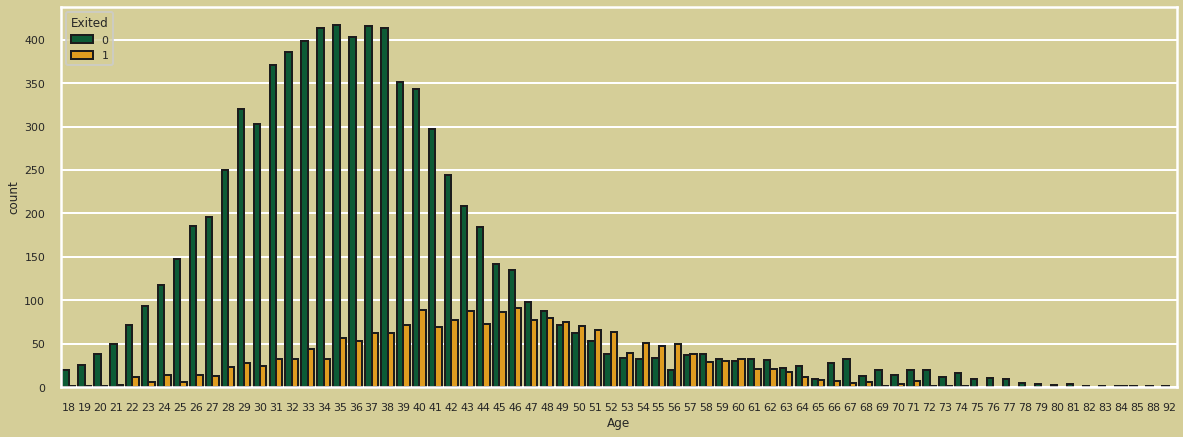

In [144]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited, palette={0:"#006837",1:"#FFA500"}, edgecolor = "#1c1c1c");

# Preprocessing of Data
- Train | Test Split, Encoding, Scaling

In [172]:
X = df.drop(columns='Exited', axis=1)
y = df['Exited']

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)

In [174]:
cols=['Gender', 'Geography']
enc1=OrdinalEncoder(categories=[['Female', 'Male']])
enc2=OrdinalEncoder(categories=[['France','Spain','Germany']])
enc = [enc1, enc2]
for i, k in zip(cols, enc):
    X_train[i]=k.fit_transform(X_train[[i]])
    X_test[i]=k.transform(X_test[[i]])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7230,670,0.000,1.000,37,2,0.000,2,1,1,54229.740
6876,591,0.000,0.000,42,10,0.000,2,0,0,171099.220
3635,740,0.000,0.000,37,5,0.000,2,1,1,27528.400
5317,700,0.000,1.000,37,1,135179.490,1,1,0,160670.370
2095,611,2.000,0.000,40,7,128486.910,2,1,0,10109.470


In [175]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [188]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [186]:
X_train.shape

(9000, 10)

In [187]:
X_test.shape

(1000, 10)

In [223]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.0015)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [224]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 150, epochs = 200, verbose=1)

Epoch 1/200
54/54 [==============================] - 2s 12ms/step - loss: 0.5755 - recall: 0.0054 - val_loss: 0.4942 - val_recall: 0.0000e+00
Epoch 2/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4922 - recall: 0.0000e+00 - val_loss: 0.4637 - val_recall: 0.0000e+00
Epoch 3/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4699 - recall: 0.0054 - val_loss: 0.4486 - val_recall: 0.0114
Epoch 4/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4571 - recall: 0.0531 - val_loss: 0.4424 - val_recall: 0.1307
Epoch 5/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4450 - recall: 0.1020 - val_loss: 0.4306 - val_recall: 0.1193
Epoch 6/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4338 - recall: 0.1593 - val_loss: 0.4157 - val_recall: 0.0966
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4216 - recall: 0.1853 - val_loss: 0.4100 - val_recall: 0.1705
Epoch 8/200
54/54 [=========

In [225]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                220       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

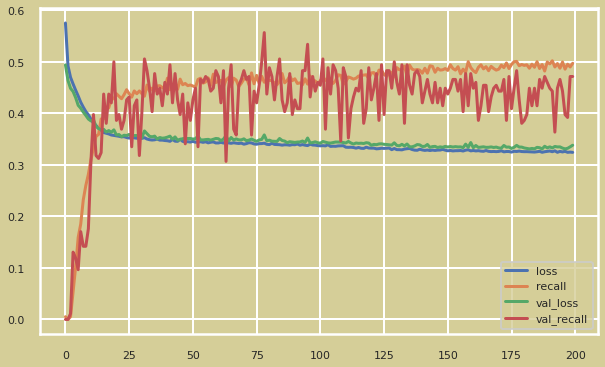

In [226]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [227]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[748  48]
 [ 96 108]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       796
           1       0.69      0.53      0.60       204

    accuracy                           0.86      1000
   macro avg       0.79      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.0015)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [228]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [229]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
54/54 [==============================] - 1s 3ms/step - loss: 0.4560 - recall: 0.7423 - val_loss: 0.4409 - val_recall: 0.7841
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4478 - recall: 0.7634 - val_loss: 0.4329 - val_recall: 0.7898
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4460 - recall: 0.7574 - val_loss: 0.4345 - val_recall: 0.7614
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4457 - recall: 0.7568 - val_loss: 0.4692 - val_recall: 0.8182
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4456 - recall: 0.7707 - val_loss: 0.4928 - val_recall: 0.8295
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4448 - recall: 0.7598 - val_loss: 0.4550 - val_recall: 0.8182
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4438 - recall: 0.7689 - val_loss: 0.4480 - val_recall: 0.7841
Epoch 8/200
54/54 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

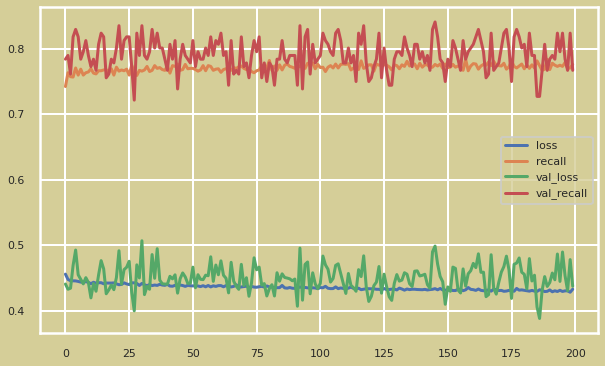

In [231]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [232]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[630 166]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [243]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [244]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [245]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
54/54 [==============================] - 1s 8ms/step - loss: 0.6681 - recall: 0.4629 - val_loss: 0.6000 - val_recall: 0.4830
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6394 - recall: 0.6210 - val_loss: 0.5870 - val_recall: 0.6080
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6160 - recall: 0.6614 - val_loss: 0.5774 - val_recall: 0.6705
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5970 - recall: 0.6771 - val_loss: 0.6471 - val_recall: 0.8182
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5798 - recall: 0.7067 - val_loss: 0.5590 - val_recall: 0.6818
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5609 - recall: 0.7103 - val_loss: 0.5342 - val_recall: 0.6705
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5407 - recall: 0.7266 - val_loss: 0.5589 - val_recall: 0.7670
Epoch 8/200
54/54 [======================

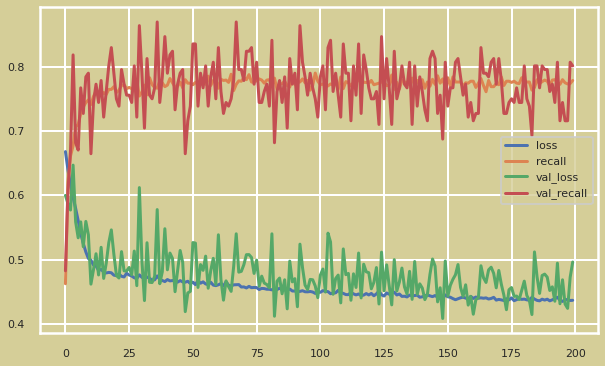

In [246]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [247]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[598 198]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.44      0.77      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



### Add Dropout Layer

In [249]:
from tensorflow.keras.layers import Dropout

In [260]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [261]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [262]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
54/54 [==============================] - 1s 7ms/step - loss: 0.6926 - recall: 0.3440 - val_loss: 0.6654 - val_recall: 0.6477
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6678 - recall: 0.5643 - val_loss: 0.6352 - val_recall: 0.7159
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6448 - recall: 0.6524 - val_loss: 0.6189 - val_recall: 0.7216
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6266 - recall: 0.6385 - val_loss: 0.6372 - val_recall: 0.7841
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6153 - recall: 0.6663 - val_loss: 0.6224 - val_recall: 0.7898
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5979 - recall: 0.6862 - val_loss: 0.6272 - val_recall: 0.8068
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5824 - recall: 0.6976 - val_loss: 0.5689 - val_recall: 0.7614
Epoch 8/200
54/54 [======================

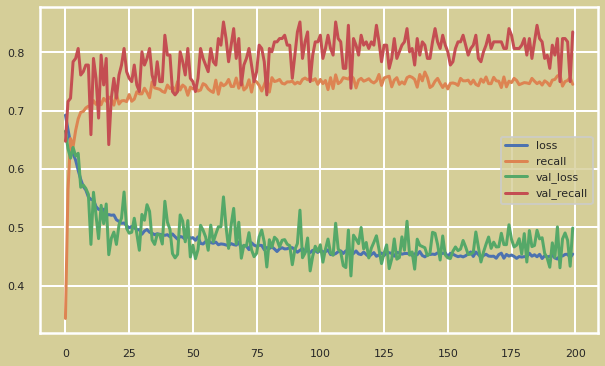

In [263]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [264]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[590 206]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.44      0.81      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.78      0.70      1000
weighted avg       0.84      0.76      0.78      1000



### Add Early Stop

In [265]:
from tensorflow.keras.callbacks import EarlyStopping

In [266]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [267]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [276]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [277]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4771 - recall: 0.7502 - val_loss: 0.4934 - val_recall: 0.7841
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4747 - recall: 0.7574 - val_loss: 0.4445 - val_recall: 0.7500
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4742 - recall: 0.7526 - val_loss: 0.4595 - val_recall: 0.7670
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4773 - recall: 0.7634 - val_loss: 0.4475 - val_recall: 0.7727
Epoch 5/200
54/54 [==============================] - 0s 6ms/step - loss: 0.4754 - recall: 0.7622 - val_loss: 0.4671 - val_recall: 0.7784
Epoch 6/200
54/54 [==============================] - 0s 6ms/step - loss: 0.4788 - recall: 0.7664 - val_loss: 0.4808 - val_recall: 0.7898
Epoch 7/200
54/54 [==============================] - 0s 6ms/step - loss: 0.4728 - recall: 0.7658 - val_loss: 0.4790 - val_recall: 0.7898
Epoch 8/200
54/54 [======================

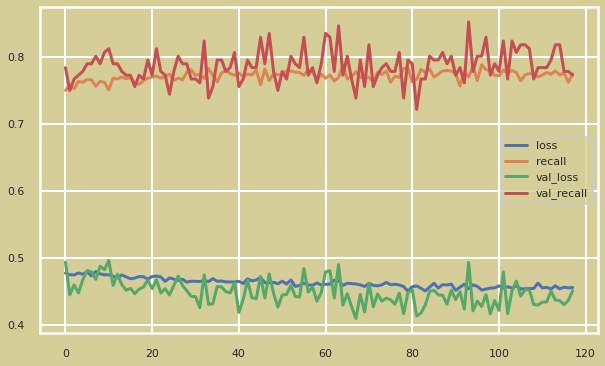

In [278]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [279]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[650 146]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       796
           1       0.50      0.72      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.80      0.81      1000



## GridSearchCV

In [280]:
# from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [287]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# def create_model(optimizer, learn_rate):
#     model = Sequential()
#     model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
#     model.add(Dropout(0.2))
#     model.add(Dense(10, activation = "relu"))
#     model.add(Dense(5, activation = "relu"))
#     model.add(Dense(1, activation = "sigmoid"))
#     model.compile(optimizer = optimizer(lr=learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
#     return model
# parameters = {'batch_size': [150, 200],
#               'optimizer': [Adam, RMSprop, Adadelta, Nadam],
#               'learn_rate': [0.002, 0.003]}
# model = KerasClassifier(build_fn=create_model, epochs=200, verbose=0)

# grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train, class_weight = class_weights)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



# Grid Search sonucunu görmeye zamanım yetmediği için elimdeki en iyi sonucu veren halini Final Model olarak kullanıyorum...

# Final Model and Model Deployment

In [288]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [289]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [290]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
54/54 [==============================] - 1s 8ms/step - loss: 0.6965 - recall: 0.7719 - val_loss: 0.6990 - val_recall: 0.6648
Epoch 2/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6737 - recall: 0.7091 - val_loss: 0.7262 - val_recall: 0.7898
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6575 - recall: 0.7031 - val_loss: 0.7043 - val_recall: 0.7386
Epoch 4/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6392 - recall: 0.6548 - val_loss: 0.6740 - val_recall: 0.6932
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6239 - recall: 0.6693 - val_loss: 0.6703 - val_recall: 0.7500
Epoch 6/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6069 - recall: 0.7073 - val_loss: 0.6467 - val_recall: 0.7443
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5936 - recall: 0.6916 - val_loss: 0.6295 - val_recall: 0.7500
Epoch 8/200
54/54 [======================

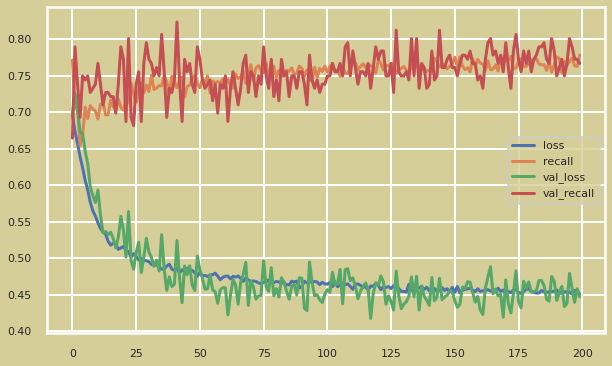

In [291]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [292]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[630 166]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.74      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.80      1000



In [293]:
model.save('model_churn.h5')

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___